In [1]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
X, y = make_circles(n_samples=500, factor=0.25, noise=0.1, random_state=0)

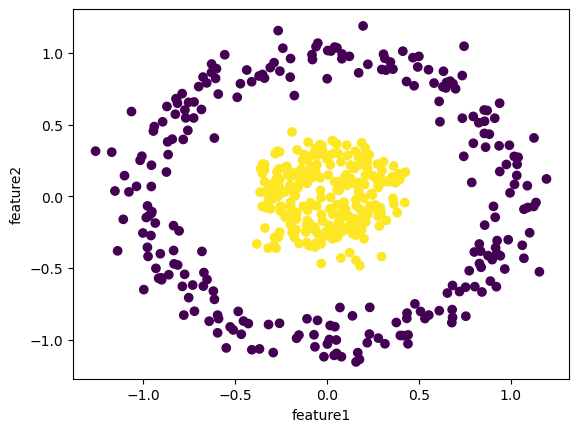

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y) #samples
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

In [7]:
# create 3rd feature
z=X[:,0]**2+X[:,1]**2 #z=x^2+y^2

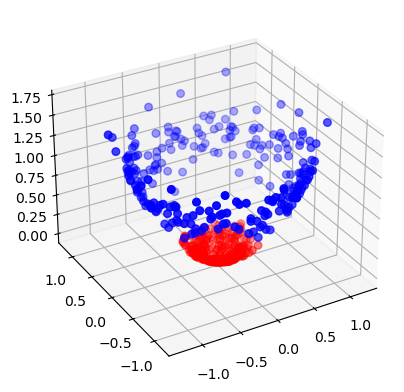

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

#plot in 3D after adding Z dimension
ax = plt.axes(projection='3d')
ax.view_init(elev=30, azim=-120)
ax.scatter3D(X[:, 0], X[:, 1], z, s=30.0, c=y.astype(float), cmap='bwr',)

In [11]:
#Add the feature to the dataset
Xn=np.column_stack((X,z)) #new dataset with three features
print(np.shape(Xn))

(500, 3)


In [13]:
from sklearn import svm
model1 = svm.SVC(kernel='linear', C=10.0) #call the algorithm
model1.fit(Xn, y) #optimize the model using training data

SVC(C=10.0, kernel='linear')

# Finding the hyperplane/plane at higher dimension

\begin{equation}
\bf{w}.X + b = 0
\end{equation}

\begin{equation}
w_1.X_1 + w_2X_2 + w_3X_3 + b = 0, X_3 = z
\end{equation}

\begin{equation}
z = X_1^2 + X_2^2
\end{equation}

\begin{equation}
w_1.X_1 + w_2X_2 + w_3X_1^2 + w_3X_2^2 + b = 0
\end{equation}

\begin{equation}
w_3.X_2^2 + w_2X_2 + w_3X_1^2 + w_1X_1 + b = 0
\end{equation}

\begin{equation}
B = w_2, C = w_3X_1^2 + w_1X_1 + b, A= w_3
\end{equation}

\begin{equation}
X_2 = (-B \pm \sqrt{B^2-4AC})/2A
\end{equation}

In [16]:
#hyperplane equation
w = model1.coef_[0]
b = model1.intercept_[0]

xsorted=np.sort(Xn[:,0]) #X_1
c= w[0]*xsorted+ w[2]*xsorted**2+b #C
b1= w[1] #B
a=w[2] #A

#two solutions
yy1=(-b1 + np.sqrt(b1**2-4.0*a*c)) / 2.0/a #X_2 #solution 1 for positive of the square root
yy2=(-b1 - np.sqrt(b1**2-4.0*a*c)) / 2.0/a #X_2 #solution 2 for negative of the square root

/tmp/ipykernel_153648/2312694264.py:11: RuntimeWarning: invalid value encountered in sqrt
  yy1=(-b1 + np.sqrt(b1**2-4.0*a*c)) / 2.0/a #X_2 #solution 1 for positive of the square root
/tmp/ipykernel_153648/2312694264.py:12: RuntimeWarning: invalid value encountered in sqrt
  yy2=(-b1 - np.sqrt(b1**2-4.0*a*c)) / 2.0/a #X_2 #solution 2 for negative of the square root


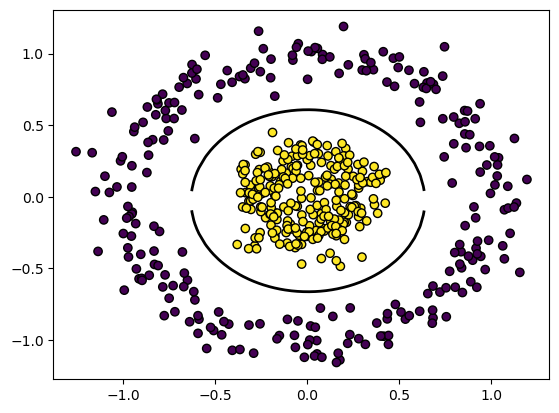

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.plot(xsorted, yy1, "-k", linewidth=2) #from linear kernel
plt.plot(xsorted, yy2, "-k", linewidth=2) #from linear kernel

plt.show()

Applying the kernel trick with a non-linear kernel

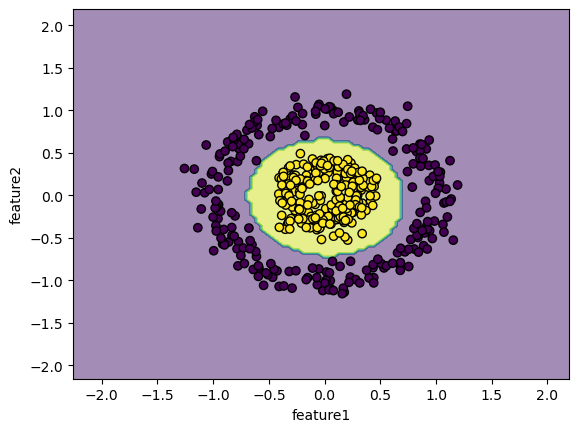

In [21]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, factor=0.3, noise=0.1, random_state=0)

from sklearn import svm
model = svm.SVC(kernel='rbf', C=50.0, gamma=0.1) #call the algorithm

model.fit(X, y) #optimize the model using training data

from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
model, X, response_method="predict", xlabel="feature1", ylabel="feature2", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

plt.show()

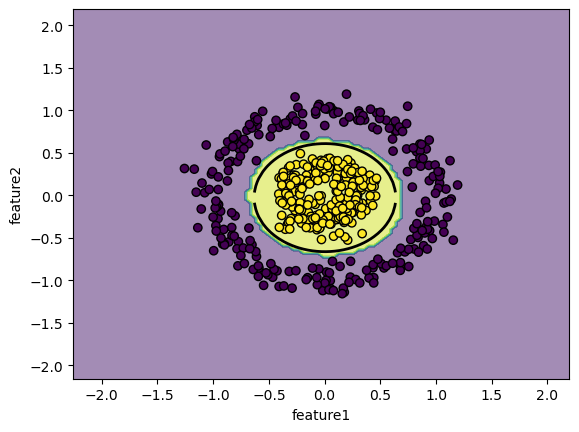

In [23]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
model, X, response_method="predict", xlabel="feature1", ylabel="feature2", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

plt.plot(xsorted, yy1, "-k", linewidth=2) #from linear kernel
plt.plot(xsorted, yy2, "-k", linewidth=2) #from linear kernel

plt.show()

In 3D

$w_1x + w_2y + w_3z + w_0 = 0$

$z = -\frac{w_1x + w_2y+w_0}{w_3}$

In [26]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, factor=0.3, noise=0.1, random_state=0)
z=X[:,0]**2+X[:,1]**2

Xn=np.column_stack((X,z))

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.2, random_state=42)

In [122]:
from sklearn import svm
model1 = svm.SVC(kernel='linear', C=1.0) #call the algorithm

model1.fit(X_train, y_train) #optimize the model using training data

SVC(kernel='linear')

In [124]:
#hyperplane equation
w = model1.coef_[0]
b = model1.intercept_[0]

# Create meshgrid for plotting decision boundary
f1min, f1max = np.amin(X_train[:, 0]), np.amax(X_train[:, 0])
f2min, f2max = np.amin(X_train[:, 1]), np.amax(X_train[:, 1])

xx = np.linspace(f1min, f1max, 100)  # x grid
yy = np.linspace(f2min, f2max, 100)  # y grid
xx, yy = np.meshgrid(xx, yy)  # Create XY grid

zz = -(b + w[0] * xx + w[1] * yy) / w[2]

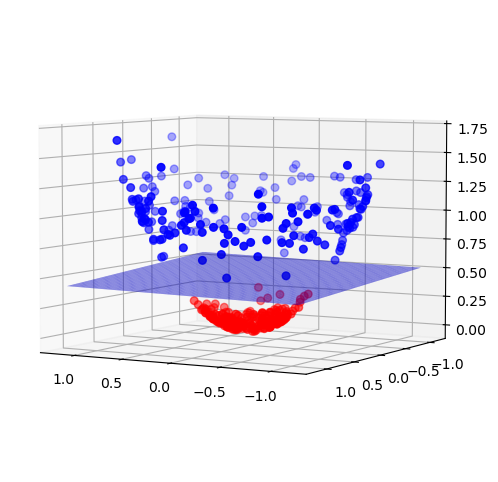

In [126]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# Plot decision boundary
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.view_init(elev=5, azim=120)
# Scatter plot of training data
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], s=30, c=y_train.astype(float), cmap='bwr')

ax.plot_surface(xx, yy, zz, color='blue', alpha=0.5)
plt.show()

In [128]:
# Evaluate the model performance
from sklearn.metrics import accuracy_score
y_pred = model1.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [130]:
# Save the Dataset
df = pd.DataFrame(Xn, columns=['Feature_1', 'Feature_2', 'Feature_3'])
df['Label'] = y

In [132]:
df.to_csv("Generated_Dataset_For_SVC.csv", index= False)

In [134]:
df

,Feature_1,Feature_2,Feature_3,Label
0,-0.697055,0.765257,1.071504,0
1,0.104857,0.048986,0.013395,1
2,0.254989,0.230096,0.117964,1
3,0.025126,-0.284946,0.081826,1
4,0.206967,-0.526438,0.319972,1
...,...,...,...,...
495,0.026250,0.349518,0.122852,1
496,0.078787,-1.119929,1.260447,0
497,-1.257591,0.314883,1.680687,0
498,0.320856,0.880231,0.877755,0
